### Gradient boosting

[Friedman, 2001]

$$ \sum_{i=1}^n L(y_i,f(x_i))\to\min_{f\in\mathscr H}$$

Idea: look for the approximate solution of the form

$$ f=\sum_{i=1}^m \alpha_i h(x_i),\quad h\in\mathscr H,\quad \alpha_i>0, $$

and try obtain this solution recursively:

$$ f_k=f_{k-1}+\alpha_k h_k. $$

If $\hat f_{k-1}$ is already constructed, then

$$\hat h_k\in\arg\min_{\alpha\ge 0,\\ h\in\mathscr H}\sum_{i=1}^n L(y_i,\hat f_{k-1}(x_i)+\alpha h(x_i)).$$

Instead of getting the exact solution, we want to make one step of the gradient method in $\mathbb R^n$ from the point $\hat f_{k-1}(x_i)$ in the direction of $\bigl(-L_{\hat y}(y_i,\hat f_{k-1}(x_i))\bigr)_{i=1}^n$. 
In fact, we first approximate this vector by some $h\in\mathcal H$, which solves the OLS problem:

$$\hat h_k\in\arg\min_{h\in\mathcal H} \sum_{i=1}^n\bigl(L_{\hat y}(y_i,\hat f_{k-1}(x_i))+h(x_i)\bigr)^2 \tag{1}$$

and then make the step in the function space $\mathscr H$:

$$ \hat f_k:=\hat f_{k-1}+\hat \alpha_k \hat h_k \tag{2} $$

where the step size $\widehat\alpha_k$ is obtained from the one-dimensional optimization problem

$$ \hat\alpha_k\in\arg\min_{\alpha\ge 0}\sum_{i=1}^n L(y_i,\hat f_{k-1}(x_i)+\alpha \hat h_k(x_i)). \tag{3}$$

For an arbitrary intial guess $\hat f_0$ the general gradient boosting algorithm is defined by (1), (3), (2):

* (1): approximate current anti-gradient
* (3): find the best step size by the line search
* (2): make the step


#### Least-squares regression: $L(y,\hat y)=(y-\hat y)^2/2$

Since $L_{\hat y}=2(\hat y -y)$, we have

$$\hat h_k\in\arg\min_{h\in\mathcal H} \sum_{i=1}^n\bigl(y_i-f_{k-1}(x_i)-h(x_i)\bigr)^2$$

Thus, at each step the model is refitted to current residuals. The step size:

$$ \hat\alpha_k\in\arg\min_{\alpha\ge 0}\sum_{i=1}^n \bigl(y_i-f_{k-1}(x_i)-\alpha h_k(x_i)\bigr)^2=\frac{\sum_{i=1}^n(y_i-f_{k-1}(x_i))h_k(x_i)}{\sum_{i=1}^n h_k^2(x_i)}. $$

#### AdaBoost: $L(y,\hat y)=e^{-y\hat y}$, $y\in \mathcal Y=\{-1,1\}$

[Freund, Schapire, 1995]

The base class $\mathscr H$ contains contains some set of classifiers $h:\mathcal X\to \{-1,1\}$. 

Since $L_{\hat y}(y,\hat y)=-ye^{-y\hat y}$, we have

\begin{align*}
&\arg\min_{h\in\mathcal H} \sum_{i=1}^n\bigl(L_{\hat y}(y_i,\hat f_{k-1}(x_i))+h(x_i)\bigr)^2=\arg\min_{h\in\mathcal H}\sum_{i=1}^n\bigl(-y_i e^{-y_i f_{k-1}(x_i)}  +h(x_i)\bigr)^2\\
&=\arg\min_{h\in\mathcal H}\sum_{i=1}^n(-2 y_i h(x_i) e^{-y_i f_{k-1}(x_i)}+h(x_i)^2)=\arg\max_{h\in\mathcal H}\sum_{i=1}^n y_i h(x_i) e^{-y_i f_{k-1}(x_i)}\\
&=\arg\max_{h\in\mathcal H}\left(\sum_{h(x_i)=y_i}e^{-y_i f_{k-1}(x_i)}-\sum_{h(x_i)\neq y_i}e^{-y_i f_{k-1}(x_i)}\right)=\arg\max_{h\in\mathcal H}\left(\sum_{i=1}^ne^{-y_i f_{k-1}(x_i)}-2\sum_{h(x_i)\neq y_i}e^{-y_i f_{k-1}(x_i)}\right)\\
&=\arg\min_{h\in\mathscr H}\sum_{h(x_i)\neq y_i}e^{-y_i f_{k-1}(x_i)}=\arg\min_{h\in\mathscr H}\sum_{i=1}^n w_i I(h(x_i)\neq y_i),\qquad w_i:=\frac{e^{-y_i f_{k-1}(x_i)}}{\sum_{j=1}^n e^{-y_j f_{k-1}(x_j)}}.
\end{align*}

The optimal classifier tries to correctly classify the points with large weights $e^{-y_i f_{k-1}(x_i)}$. In fact those which were incorrectly classified by $f_{k-1}$.

*Optimal stepsize*

$$ \hat\alpha_k\in\arg\min_{\alpha\ge 0}\sum_{i=1}^n L(y_i,\hat f_{k-1}(x_i)+\alpha \hat h_k(x_i))=\min_{\alpha\ge 0}\sum_{i=1}^n e^{-y_i(f_k(x_i)+\alpha h_k(x_i))}.$$

Derivative with respect to $\alpha$:

$$-\sum_{i=1}^n y_i h_k(x_i) e^{-y_i(f_{k-1}(x_i)+\alpha h_k(x_i))}=-\sum_{h_k(x_i)=y_i}e^{-y_if_{k-1}(x_i)} e^{-\alpha}+\sum_{h_k(x_i)\neq y_i}e^{-y_i f_{k-1}(x_i)} e^{\alpha}=0.$$

Eqiivalently, 

$$\sum_{h_k(x_i)=y_i} w_i e^{-\alpha}-\sum_{h_k(x_i)\neq y_i} w_i e^{\alpha}=(1-\varepsilon_k) e^{-\alpha}-\varepsilon_k e^\alpha=0,\qquad \varepsilon_k=\sum_{h_k(x_i)\neq y_i} w_i.$$

Thus,

$$ \hat\alpha_k=\frac{1}{2}\ln\frac{1-\varepsilon_{k}}{\varepsilon_{k}}.  $$

*Weight update*

Let us give the weights additional time index:

$$w_{k-1,i}:=\frac{e^{-y_i f_{k-1}(x_i)}}{\sum_{j=1}^n e^{-y_j f_{k-1}(x_j)}}$$
    
Unnormalized weights update:

$$ \widetilde w_{k,i}=e^{-y_i f_k (x_i)}=e^{-y_i f_{k-1} (x_i)}e^{-\alpha_k y_i h_k (x_i)}=\widetilde w_{k-1,i}e^{-\alpha_k y_i h_k (x_i)}. $$

Furthermore, put

$$ Z_k=\sum_{j=1}^n \widetilde w_{k,j}=\sum_{j=1}^n e^{-y_j f_k (x_j)}. $$

We have

\begin{align*}
\frac{Z_k}{Z_{k-1}} &=\frac{\sum_{i=1}^n e^{-y_i(f_{k-1}(x_i)+\alpha_k h_k(x_i))}}{\sum_{j=1}^n e^{-y_j f_{k-1}(x_j)}}=\sum_{i=1}^n w_{k-1,i} e^{-\alpha_k y_i h_k(x_i)}\\
&=e^{-\alpha_k}\sum_{y_i=h_k(x_i)} w_{k-1,i}+e^{\alpha_k}\sum_{y_i\neq h_k(x_i)} w_{k-1,i}=e^{-\alpha_k} (1-\varepsilon_k)+e^{\alpha_k}\varepsilon_k
\end{align*}

Substituting $\alpha_k$:

$$ e^{-\alpha_k}=\sqrt\frac{\varepsilon_k}{1-\varepsilon_k}, \quad e^{\alpha_k}=\sqrt\frac{1-\varepsilon_k}{\varepsilon_k},$$

we get 

$$\frac{Z_k}{Z_{k-1}}=2\sqrt{\varepsilon_k(1-\varepsilon_k)},$$ 

$$ w_{k,i}=\frac{\widetilde w_{k,i}}{Z_k}=\frac{\widetilde w_{k-1,i}e^{-\alpha_k y_i h_k (x_i)}}{Z_{k-1} 2\sqrt{\varepsilon_k(1-\varepsilon_k)}}=w_{k-1,i}\frac{e^{-\alpha_k y_i h_k (x_i)}}{2\sqrt{\varepsilon_k(1-\varepsilon_k)}} $$



*AdaBoost algorithm:*

Starting from zero classifier $f_0=0$, and the corresponding uniform weights $w_{0,i}=1$,

* Approximate current anti-gradient: that is, find the classifier

$$h_k=\arg\min_{h\in\mathscr H}\sum_{i=1}^n w_{k-1,i} I(h(x_i)\neq y_i),\qquad w_{k-1,i}:=\frac{e^{-y_i f_{k-1}(x_i)}}{\sum_{j=1}^n e^{-y_j f_{k-1}(x_j)}}$$

* Compute the step size

$$ \hat\alpha_k=\frac{1}{2}\ln\frac{1-\varepsilon_{k}}{\varepsilon_{k}}, \qquad \varepsilon_k=\sum_{h_k(x_i)\neq y_i} w_{k,i}.  $$

* Make the step:

$$ f_k:=f_{k-1}+ \alpha_k  h_k $$

and update the weights:

$$ w_{k,i}=w_{k-1,i}\frac{e^{-\alpha_k y_i h_k (x_i)}}{2\sqrt{\varepsilon_k(1-\varepsilon_k)}}. $$


**Theorem**. Assume that at each iteration of AdaBoost, the weak learner returns a hypothesis for which $\varepsilon_t\le 1/2-\gamma$. Then, the training error of the output hypothesis of AdaBoost is at most

$$ L_S(f_m)=\frac{1}{n}\sum_{i=1}^n I_{\{f_m(x_i)\neq y_i\}}\le e^{-2\gamma^2 m} $$

(see Shalev-Schwartz, Ben-David, 2014).

*Proof.*

\begin{align*}
 L_S(f_m) &=\frac{1}{n}\sum_{i=1}^n I_{\{f_m(x_i)\neq y_i\}}\le \frac{1}{n}\sum_{i=1}^n e^{-y_i f_m(x_i)}\\
 &=\frac{1}{n} Z_m=\frac{Z_0}{n}\prod_{k=1}^m 2 \sqrt{\varepsilon_k(1-\varepsilon_k)}=2^m\prod_{k=1}^m \sqrt{\varepsilon_k(1-\varepsilon_k)}.
\end{align*}

The function $g(c)=c(1-c)$ increases at $[0,1/2]$. By our assumption, $\varepsilon_k\le 1/2-\gamma$. Thus,

$$ L_S(f_m)\le 2^m\prod_{k=1}^m \sqrt{(1/2-\gamma)(1/2+\gamma)}=\left(1- 4\gamma^2\right)^{m/2}. $$

From the inequality $1-a\le e^{-a}$ it follows that

$$ \sqrt{1-4\gamma^2}\le e^{-2\gamma^2}.\qquad \square$$



#### TreeBoost

[Friedman, 2001]

Basic class $\mathscr H$ consists of tree classifiers

$$ f(x)=\sum_{j=1}^J b_j I(x\in R_j). $$

In general optimal step size is obtained as

$$ \alpha_k\in\arg\min_{\alpha\ge 0}\sum_{i=1}^n L(y_i,\hat f_{k-1}(x_i)+\alpha \hat h_k(x_i)). $$

The update rule:

$$ f_k(x)=f_{k-1}(x)+\alpha_k \sum_{j=1}^J b_{k,j} I(x\in R_{k,j})=f_{k-1}(x)+\sum_{j=1}^J \gamma_{k,j} I(x\in R_{k,j})$$

In TreeBoost instead of one optimal $\alpha_k$ for each classifier one looks for optimal $\gamma_{k,j}$ separately at each $R_{k,j}$:

$$ \gamma_{kj}=\arg\min_{\gamma_{kj}}\sum_{i=1}^n L(y_i,\hat f_{k-1}(x_i)+\gamma_{kj}).
$$

#### XGBoost

[Chen, Guestrin 2016]

* Take trees as a basic class $\mathscr H$:

$$ f(x)=\sum_{j=1}^J w_j I(x\in R_j). $$

* Add a regularization:

$$\sum_{i=1}^n L(y_i,f_m(x_i))+\sum_{k=1}^m \Omega(h_k),\qquad \Omega(h)= \gamma |J|+\frac{\lambda}{2}\sum_{j=1}^J w_j^2,$$

where $f_m=h_1+\dots+h_m$.

* Use second order approximation (Newton method instead of gradient descent) for the approximate solution of the problem

\begin{align*}
\hat h_k &\in\arg\min_{h\in\mathscr H}\left(\sum_{i=1}^n L(y_i,\hat f_{k-1}(x_i)+h(x_i))+\Omega(h)\right)\\
&\approx \arg\min_{h\in\mathscr H}\left(\sum_{i=1}^n \alpha_i h(x_i)+\frac{1}{2}\beta_i h^2(x_i)+\gamma |J|+\frac{\lambda}{2}\sum_{j=1}^J w_j^2 \right)\\
&\approx \arg\min_{h\in\mathscr H}\left\{\sum_{j=1}^J \left(\left[\sum_{i:x_i\in R_j}\alpha_i\right] w_j+\frac{1}{2}\left[\lambda+\sum_{i:x_i\in R_j}\beta_i \right]w_j^2 \right)+\gamma |J|\right\}
\end{align*}

Minimize over $w$:
   
$$ w_j^*=-\frac{\sum_{i:x_i\in R_j}\alpha_i}{\lambda+\sum_{i:x_i\in R_j}\beta_i }$$

The corresponding optimal value:

$$ \tilde {\mathcal L}_k(h)=-\frac{1}{2}\sum_{j=1}^J \frac{\left(\sum_{i:x_i\in R_j}\alpha_i\right)^2}{\lambda+\sum_{i:x_i\in R_j}\beta_i }+\gamma |J|$$

is used as an impurity measure for approximate solution of the problem

$$ \hat h_k \in\arg\min_{h\in\mathscr H} \tilde {\mathcal L}_k(h).$$

In scikit-learn `GradientBoostingClassifier` and `GradientBoostingRegressor` use trees as the basic class (TreeBoost).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = "tight"

np.set_printoptions(precision=3)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

#### Iris data set

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify=iris.target, random_state=0)
gbrt = GradientBoostingClassifier().fit(X_train, y_train)
gbrt.score(X_test, y_test)

0.9736842105263158

#### Regression: synthetic dataset

In [4]:
from sklearn.ensemble import GradientBoostingRegressor

def make_wave(n_samples=100):
    rnd = np.random.RandomState(42)
    x = rnd.uniform(-3, 3, size=n_samples)
    y_no_noise = (np.sin(4 * x))
    y = (y_no_noise + rnd.normal(scale=0.2, size=len(x))) / 2
    return x.reshape(-1, 1), y
X, y = make_wave(100)

def make_poly(n_samples=100):
    rnd = np.random.RandomState(42)
    x = rnd.uniform(-3, 3, size=n_samples)
    y_no_noise = (x) ** 3
    y = (y_no_noise + rnd.normal(scale=3, size=len(x))) / 2
    return x.reshape(-1, 1), y

X, y = make_poly()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [5]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=10, learning_rate=.3, random_state=0).fit(X_train, y_train)
gbrt.score(X_test, y_test)

0.8117763334371787

The default loss function is the least squares regression: `ls`

`n_estimators`: the same as $m$  
The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance (`scikit-learn`).

`staged_predict(X)`: Predict regression target at each stage for X

`estimators_`: ndarray of DecisionTreeRegressor of shape (n_estimators, 1). The collection of fitted sub-estimators

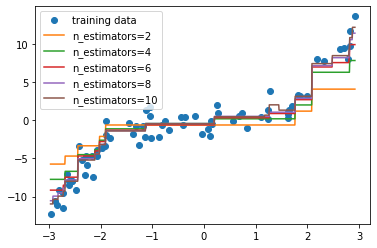

In [6]:
line = np.linspace(X.min(), X.max(), 1000)
preds = list(gbrt.staged_predict(line[:, np.newaxis]))
plt.plot(X_train[:, 0], y_train, 'o', label="training data")
for i in range(1, 10, 2):
    plt.plot(line, preds[i], label="n_estimators={}".format(i + 1))

plt.legend()

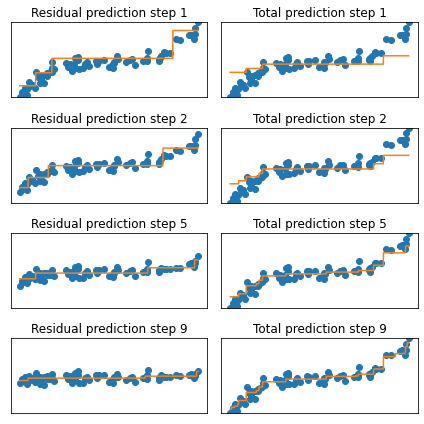

In [7]:
preds_train = [np.zeros(len(y_train))] + list(gbrt.staged_predict(X_train))

fig, axes = plt.subplots(4, 2, subplot_kw={'xticks': (()), 'yticks': (())}, figsize=(6, 6))
#fig, axes = plt.subplots(4, 2, figsize=(12, 12))

n_estimators = [0, 1, 4, 8]
for i in range(4):
    k = n_estimators[i]
    axes[i, 0].plot(X_train[:, 0], y_train - preds_train[k], 'o')
    axes[i, 0].plot(line, gbrt.estimators_[k, 0].predict(line[:, np.newaxis]))
    axes[i, 1].plot(X_train[:, 0], y_train, 'o')
    axes[i, 1].plot(line, preds[k])
    axes[i, 0].set_title("Residual prediction step {}".format(k + 1))
    axes[i, 1].set_title("Total prediction step {}".format(k + 1))

for ax in axes.ravel():
    ax.set_ylim(y.min(), y.max())
plt.tight_layout()
plt.savefig("images/grad_boost_regression_steps.png")

In [8]:
gbrt.estimators_[k, 0]

DecisionTreeRegressor(criterion='friedman_mse', max_depth=2,
                      random_state=RandomState(MT19937) at 0x14A15E65E40)

#### Classification: synthetic moon data

In [9]:
from sklearn.datasets import make_moons
X, y = make_moons(noise=.2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
gbrt = GradientBoostingClassifier(max_depth=2, n_estimators=10, learning_rate=.2, random_state=0).fit(X_train, y_train)
gbrt.score(X_test, y_test)

1.0

The default loss function is the logistic regression: `deviance`.  For loss `exponential` gradient boosting recovers the AdaBoost algorithm. 

In [10]:
# create a grid for plotting decision functions...
x_lin = np.linspace(X_train[:, 0].min() - .5, X_train[:, 0].max() + .5, 100)
y_lin = np.linspace(X_train[:, 1].min() - .5, X_train[:, 1].max() + .5, 100)
x_grid, y_grid = np.meshgrid(x_lin, y_lin)
# all points in the Cartesian product
X_grid = np.c_[x_grid.ravel(), y_grid.ravel()]
probs = list(gbrt.staged_predict_proba(X_grid))

In [11]:
np.c_[np.array([1,2,3]), np.array([4,5,6])]

array([[1, 4],
       [2, 5],
       [3, 6]])

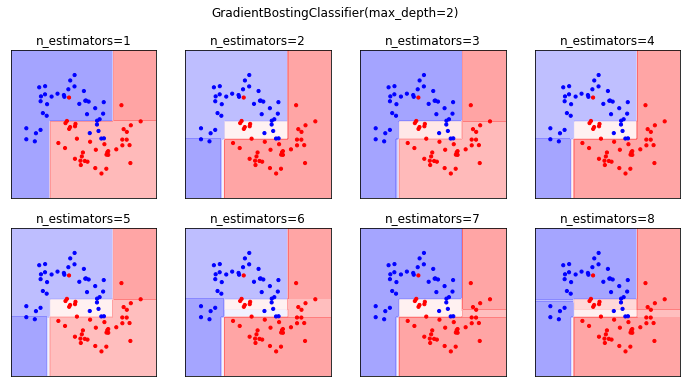

In [12]:
fig, axes = plt.subplots(2, 4, subplot_kw={'xticks': (()), 'yticks': (())}, figsize=(12, 6))
for i, (prob, ax) in enumerate(zip(probs, axes.ravel())):
    ax.set_title("n_estimators={}".format(i + 1))
    ax.contourf(x_grid, y_grid, prob[:, 1].reshape(x_grid.shape), alpha=.4, cmap='bwr')
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', s=10)
fig.suptitle("GradientBostingClassifier(max_depth=2)")
plt.savefig("images/grad_boost_depth2.png")

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate': [.2, .1, .05, .02, .01, .001]}
grid = GridSearchCV(GradientBoostingClassifier(),
                    param_grid=param_grid, cv=10,
                    return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.2, 0.1, 0.05, 0.02, 0.01, 0.001]},
             return_train_score=True)

<AxesSubplot:xlabel='param_learning_rate'>

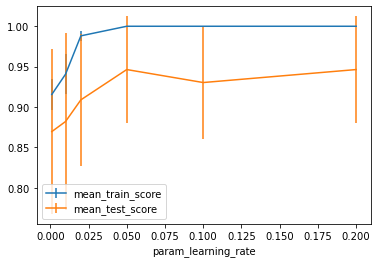

In [14]:
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_learning_rate', y='mean_train_score', yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_learning_rate', y='mean_test_score', yerr='std_test_score', ax=plt.gca())

#### Regression: Boston dataset

In [15]:
from sklearn.datasets import load_boston
from sklearn.ensemble import GradientBoostingRegressor
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, random_state=0)

gbrt = GradientBoostingRegressor().fit(X_train, y_train)
gbrt.score(X_test, y_test)

0.8178289312547996

In [16]:
param_grid = {'learning_rate': [.5, .2, .1, .05, .02, .01, .001]}
grid = GridSearchCV(GradientBoostingRegressor(), param_grid=param_grid, cv=10,
                   return_train_score=True)
grid.fit(X_train, y_train);

<AxesSubplot:xlabel='param_learning_rate'>

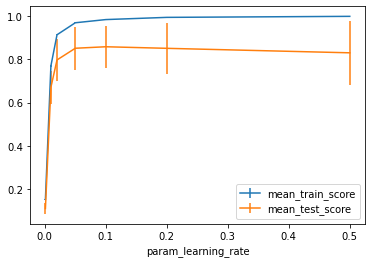

In [17]:
scores = pd.DataFrame(grid.cv_results_)

scores.plot(x='param_learning_rate', y='mean_train_score', yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_learning_rate', y='mean_test_score', yerr='std_test_score', ax=plt.gca())

In [18]:
grid.best_params_, grid.best_score_

({'learning_rate': 0.1}, 0.8589595750186513)

In [19]:
gbrt.feature_importances_

array([0.033, 0.   , 0.003, 0.001, 0.025, 0.309, 0.006, 0.055, 0.002,
       0.015, 0.045, 0.006, 0.501])

`feature_importances_` The impurity-based feature importances.

The higher, the more important the feature. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.

In [20]:
# 5 features with highest importances
np.flip(np.argsort(gbrt.feature_importances_)[-5:])

array([12,  5,  7, 10,  0], dtype=int64)

#### XGBoost: Boston dataset

https://www.datacamp.com/community/tutorials/xgboost-in-python

In [21]:
# conda install -c conda-forge xgboost

In [52]:
from sklearn.datasets import load_boston
boston = load_boston()
import pandas as pd
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [53]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [54]:
X, y = data.iloc[:,:-1],data.iloc[:,-1]
# Convert the dataset into an optimized data structure called Dmatrix that XGBoost supports 
# and gives it acclaimed performance and efficiency gains.
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

#### XGBoost's hyperparameters

* `learning_rate`: step size shrinkage used to prevent overfitting. Range is [0,1]
* `max_depth`: determines how deeply each tree is allowed to grow during any boosting round.
* `subsample`: percentage of samples used per tree. Low value can lead to underfitting.
* `colsample_bytree`: percentage of features used per tree. High value can lead to overfitting.
* `n_estimators`: number of trees you want to build.
* `objective`: determines the loss function to be used like `reg:linear` for regression problems, `reg:logistic` for classification problems with only decision, `binary:logistic` for classification problems with probability
* `gamma`: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.
* `alpha`: L1 regularization on leaf weights. A large value leads to more regularization.
* `lambda`: L2 regularization on leaf weights and is smoother than L1 regularization.

In [57]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [58]:
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

C:\Users\rokhl\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [44]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 6.455243


Cross-validation

* `num_boost_round`: denotes the number of trees you build (analogous to `n_estimators`)
* `metrics`: tells the evaluation metrics to be watched during CV
* `as_pandas`: to return the results in a pandas DataFrame.
* `early_stopping_rounds`: finishes training of the model early if the hold-out metric ("rmse" in our case) does not improve for a given number of rounds.
* `seed`: for reproducibility of results.

In [59]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

cv_results contains train and test RMSE metrics for each boosting round

In [60]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,12.902118,0.156682,12.933148,0.346260
1,11.845931,0.142842,11.874341,0.345186
2,10.888719,0.098074,10.928369,0.355489
3,10.036862,0.102325,10.106069,0.328625
4,9.282298,0.088875,9.368852,0.309637


Extract and print the final boosting round metric.

In [66]:
print((cv_results["test-rmse-mean"]).tail(1))

49    3.995269
Name: test-rmse-mean, dtype: float64


In [62]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

In [63]:
# pip install graphviz

In [64]:
#import matplotlib.pyplot as plt

#xgb.plot_tree(xg_reg,num_trees=0)
#plt.rcParams['figure.figsize'] = [50, 10]
#plt.show()

Count the number of times each feature is split on across all boosting rounds (trees) in the model, and then visualizing the result as a bar graph, with the features ordered according to how many times they appear. XGBoost has a plot_importance() function that allows you to do exactly this.

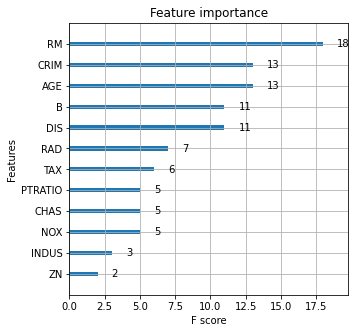

In [67]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

AdaBoost classifier example from scikit-learn

https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_twoclass.html?highlight=adaboost

Automatically created module for IPython interactive environment


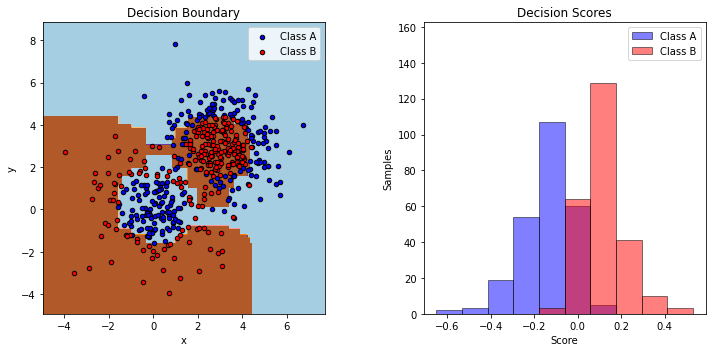

In [69]:
print(__doc__)

# Author: Noel Dawe <noel.dawe@gmail.com>
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles


# Construct dataset
X1, y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=200, n_features=2,
                                 n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=300, n_features=2,
                                 n_classes=2, random_state=1)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))

# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)

bdt.fit(X, y)

plot_colors = "br"
plot_step = 0.02
class_names = "AB"

plt.figure(figsize=(10, 5))

# Plot the decision boundaries
plt.subplot(121)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1],
                c=c, cmap=plt.cm.Paired,
                s=20, edgecolor='k',
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')

# Plot the two-class decision scores
twoclass_output = bdt.decision_function(X)
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(twoclass_output[y == i],
             bins=10,
             range=plot_range,
             facecolor=c,
             label='Class %s' % n,
             alpha=.5,
             edgecolor='k')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc='upper right')
plt.ylabel('Samples')
plt.xlabel('Score')
plt.title('Decision Scores')

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()

In [70]:
from sklearn.datasets import make_gaussian_quantiles# Construct dataset
X1, y1 = make_gaussian_quantiles(cov=3.,
                                 n_samples=10000, n_features=2,
                                 n_classes=2, random_state=1)
X1 = pd.DataFrame(X1,columns=['x','y'])
y1 = pd.Series(y1)
visualize_2d(X1,y1)

NameError: name 'visualize_2d' is not defined